In [459]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV 
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import mean_squared_error

from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

import xgboost as xgb
import lightgbm as lgb

sns.set(style='white', context='notebook', palette='deep')

In [460]:
training_df = pd.read_csv("Train.csv")
testing_df = pd.read_csv("Test.csv")
riders_df = pd.read_csv("Riders.csv")

In [461]:
print(training_df.sample(10))
print(testing_df.sample(10))
print(riders_df.sample(10))

             Order No       User Id Vehicle Type  Platform Type  \
16823  Order_No_13409  User_Id_3283         Bike              3   
9210   Order_No_17350  User_Id_1329         Bike              3   
14725  Order_No_23214  User_Id_1207         Bike              3   
9428     Order_No_669  User_Id_2532         Bike              3   
2297   Order_No_12800  User_Id_2869         Bike              3   
7379   Order_No_22686   User_Id_998         Bike              2   
15078   Order_No_7270  User_Id_3647         Bike              3   
3384   Order_No_16341  User_Id_3621         Bike              3   
6010   Order_No_21942  User_Id_3291         Bike              3   
8526   Order_No_11378  User_Id_2030         Bike              3   

      Personal or Business  Placement - Day of Month  \
16823             Business                        21   
9210              Business                         7   
14725             Business                         5   
9428              Business            

In [462]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
Order No                                7068 non-null object
User Id                                 7068 non-null object
Vehicle Type                            7068 non-null object
Platform Type                           7068 non-null int64
Personal or Business                    7068 non-null object
Placement - Day of Month                7068 non-null int64
Placement - Weekday (Mo = 1)            7068 non-null int64
Placement - Time                        7068 non-null object
Confirmation - Day of Month             7068 non-null int64
Confirmation - Weekday (Mo = 1)         7068 non-null int64
Confirmation - Time                     7068 non-null object
Arrival at Pickup - Day of Month        7068 non-null int64
Arrival at Pickup - Weekday (Mo = 1)    7068 non-null int64
Arrival at Pickup - Time                7068 non-null object
Pickup - Day of Month                   7068 n

In [463]:
riders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
Rider Id          960 non-null object
No_Of_Orders      960 non-null int64
Age               960 non-null int64
Average_Rating    960 non-null float64
No_of_Ratings     960 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


In [464]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
Order No                                     21201 non-null object
User Id                                      21201 non-null object
Vehicle Type                                 21201 non-null object
Platform Type                                21201 non-null int64
Personal or Business                         21201 non-null object
Placement - Day of Month                     21201 non-null int64
Placement - Weekday (Mo = 1)                 21201 non-null int64
Placement - Time                             21201 non-null object
Confirmation - Day of Month                  21201 non-null int64
Confirmation - Weekday (Mo = 1)              21201 non-null int64
Confirmation - Time                          21201 non-null object
Arrival at Pickup - Day of Month             21201 non-null int64
Arrival at Pickup - Weekday (Mo = 1)         21201 non-null int64
Arrival at Pickup - Time   

In [465]:
training_df.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

In [466]:
training_df.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [467]:
testing_df.isnull().sum()

Order No                                   0
User Id                                    0
Vehicle Type                               0
Platform Type                              0
Personal or Business                       0
Placement - Day of Month                   0
Placement - Weekday (Mo = 1)               0
Placement - Time                           0
Confirmation - Day of Month                0
Confirmation - Weekday (Mo = 1)            0
Confirmation - Time                        0
Arrival at Pickup - Day of Month           0
Arrival at Pickup - Weekday (Mo = 1)       0
Arrival at Pickup - Time                   0
Pickup - Day of Month                      0
Pickup - Weekday (Mo = 1)                  0
Pickup - Time                              0
Distance (KM)                              0
Temperature                             1437
Precipitation in millimeters            6869
Pickup Lat                                 0
Pickup Long                                0
Destinatio

In [468]:
riders_df.isnull().sum()

Rider Id          0
No_Of_Orders      0
Age               0
Average_Rating    0
No_of_Ratings     0
dtype: int64

In [469]:
riders_df.head(5)

Rider Id  No_Of_Orders   Age  Average_Rating  No_of_Ratings
0  Rider_Id_396          2946  2298            14.0           1159
1  Rider_Id_479           360   951            13.5            176
2  Rider_Id_648          1746   821            14.3            466
3  Rider_Id_753           314   980            12.5             75
4  Rider_Id_335           536  1113            13.7            156

In [470]:
def column_edit(df):
    
    training_cols = [i.replace(' ','_') for i in[i.replace(' = ','=') for i in[i.replace(' - ','_') for i in df.columns]]]
    return training_cols

In [471]:
training_df.columns = column_edit(training_df)
riders_df.columns = column_edit(riders_df)
testing_df.columns = column_edit(testing_df)
training_df.sample(5)
training_df.columns

Index(['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type',
       'Personal_or_Business', 'Placement_Day_of_Month',
       'Placement_Weekday_(Mo=1)', 'Placement_Time',
       'Confirmation_Day_of_Month', 'Confirmation_Weekday_(Mo=1)',
       'Confirmation_Time', 'Arrival_at_Pickup_Day_of_Month',
       'Arrival_at_Pickup_Weekday_(Mo=1)', 'Arrival_at_Pickup_Time',
       'Pickup_Day_of_Month', 'Pickup_Weekday_(Mo=1)', 'Pickup_Time',
       'Arrival_at_Destination_Day_of_Month',
       'Arrival_at_Destination_Weekday_(Mo=1)', 'Arrival_at_Destination_Time',
       'Distance_(KM)', 'Temperature', 'Precipitation_in_millimeters',
       'Pickup_Lat', 'Pickup_Long', 'Destination_Lat', 'Destination_Long',
       'Rider_Id', 'Time_from_Pickup_to_Arrival'],
      dtype='object')

In [472]:
training_df['Age'] = [age for rider in training_df['Rider_Id'] for age in riders_df.loc[riders_df['Rider_Id']==rider,'Age']]
testing_df['Age'] = [age for rider in testing_df['Rider_Id'] for age in riders_df.loc[riders_df['Rider_Id']==rider,'Age']]
training_df['Average_Rating'] = [Average_Rating for rider in training_df['Rider_Id'] for Average_Rating in riders_df.loc[riders_df['Rider_Id']==rider,'Average_Rating']]
testing_df['Average_Rating'] = [Average_Rating for rider in testing_df['Rider_Id'] for Average_Rating in riders_df.loc[riders_df['Rider_Id']==rider,'Average_Rating']]
training_df.head(5)

Order_No       User_Id Vehicle_Type  Platform_Type  \
0   Order_No_4211   User_Id_633         Bike              3   
1  Order_No_25375  User_Id_2285         Bike              3   
2   Order_No_1899   User_Id_265         Bike              3   
3   Order_No_9336  User_Id_1402         Bike              3   
4  Order_No_27883  User_Id_1737         Bike              1   

  Personal_or_Business  Placement_Day_of_Month  Placement_Weekday_(Mo=1)  \
0             Business                       9                         5   
1             Personal                      12                         5   
2             Business                      30                         2   
3             Business                      15                         5   
4             Personal                      13                         1   

  Placement_Time  Confirmation_Day_of_Month  Confirmation_Weekday_(Mo=1)  \
0     9:35:46 AM                          9                            5   
1    11:16:16 AM                         12                            5   
2    12:39:25 PM                         30                            2   
3     9:25:34 AM                         15                            5   
4     9:55:18 AM                         13                            1   

       ...       Temperature  Precipitation_in_millimeters  Pickup_Lat  \
0      ...              20.4                           NaN   -1.317755   
1      ...              26.4                           NaN   -1.351453   
2      ...               NaN                           NaN   -1.308284   
3      ...              19.2                           NaN   -1.281301   
4      ...              15.4                           NaN   -1.266597   

  Pickup_Long  Destination_Lat  Destination_Long      Rider_Id  \
0   36.830370        -1.300406         36.829741  Rider_Id_432   
1   36.899315        -1.295004         36.814358  Rider_Id_856   
2   36.843419        -1.300921         36.828195  Rider_Id_155   
3   36.832396        -1.257147         36.795063  Rider_Id_855   
4   36.792118        -1.295041         36.809817  Rider_Id_770   

   Time_from_Pickup_to_Arrival   Age Average_Rating  
0                          745  1309           13.8  
1                         1993   339           13.6  
2                          455   242           12.5  
3                         1341   283           14.5  
4                         1214   872           14.1  

[5 rows x 31 columns]

In [473]:
training_df['Age'].sample(5)
training_df.dtypes

Order_No                                  object
User_Id                                   object
Vehicle_Type                              object
Platform_Type                              int64
Personal_or_Business                      object
Placement_Day_of_Month                     int64
Placement_Weekday_(Mo=1)                   int64
Placement_Time                            object
Confirmation_Day_of_Month                  int64
Confirmation_Weekday_(Mo=1)                int64
Confirmation_Time                         object
Arrival_at_Pickup_Day_of_Month             int64
Arrival_at_Pickup_Weekday_(Mo=1)           int64
Arrival_at_Pickup_Time                    object
Pickup_Day_of_Month                        int64
Pickup_Weekday_(Mo=1)                      int64
Pickup_Time                               object
Arrival_at_Destination_Day_of_Month        int64
Arrival_at_Destination_Weekday_(Mo=1)      int64
Arrival_at_Destination_Time               object
Distance_(KM)       

In [474]:
training_df.drop(['Vehicle_Type','Platform_Type','Placement_Day_of_Month',
                  'Placement_Weekday_(Mo=1)', 'Placement_Time',
       'Confirmation_Day_of_Month', 'Confirmation_Weekday_(Mo=1)',
       'Confirmation_Time', 'Arrival_at_Pickup_Day_of_Month',
       'Arrival_at_Pickup_Weekday_(Mo=1)', 'Arrival_at_Pickup_Time',
       'Arrival_at_Destination_Day_of_Month',
       'Arrival_at_Destination_Weekday_(Mo=1)', 'Arrival_at_Destination_Time'],axis=1, inplace = True)
testing_df.drop(['Vehicle_Type','Platform_Type','Placement_Day_of_Month',
                  'Placement_Weekday_(Mo=1)', 'Placement_Time',
       'Confirmation_Day_of_Month', 'Confirmation_Weekday_(Mo=1)',
       'Confirmation_Time', 'Arrival_at_Pickup_Day_of_Month',
       'Arrival_at_Pickup_Weekday_(Mo=1)', 'Arrival_at_Pickup_Time'],axis=1, inplace = True)
training_df.sample()

Order_No       User_Id Personal_or_Business  Pickup_Day_of_Month  \
7688  Order_No_24116  User_Id_1363             Business                   14   

      Pickup_Weekday_(Mo=1)  Pickup_Time  Distance_(KM)  Temperature  \
7688                      5  11:36:23 AM              8         22.0   

      Precipitation_in_millimeters  Pickup_Lat  Pickup_Long  Destination_Lat  \
7688                           NaN   -1.300406    36.829741        -1.257422   

      Destination_Long      Rider_Id  Time_from_Pickup_to_Arrival  Age  \
7688         36.792707  Rider_Id_567                          330  175   

      Average_Rating  
7688            12.6

In [475]:
new_column={'Personal_or_Business':'Order_Type','Pickup_Day_of_Month':'Day_of_Month',
            'Pickup_Weekday_(Mo=1)':'Weekday','Pickup_Time':'Time',
            'Distance_(KM)':'Distance(KM)','Time_from_Pickup_to_Arrival':'Delivery_Time(sec)'}
training_df.columns = [new_column.get(i,i) for i in training_df.columns]
testing_df.columns = [new_column.get(i,i) for i in testing_df.columns]
training_df.sample()    
# training_df.columns

Order_No       User_Id Order_Type  Day_of_Month  Weekday  \
3525  Order_No_21851  User_Id_1637   Business            21        1   

             Time  Distance(KM)  Temperature  Precipitation_in_millimeters  \
3525  12:56:48 PM            15         25.6                           NaN   

      Pickup_Lat  Pickup_Long  Destination_Lat  Destination_Long  \
3525   -1.207546    36.791398        -1.261589         36.792873   

          Rider_Id  Delivery_Time(sec)  Age  Average_Rating  
3525  Rider_Id_611                1547  740            13.5

In [476]:
training_df['Time'] = pd.to_datetime(training_df['Time'], format='%I:%M:%S %p').dt.strftime("%H:%M:%S")
training_df['Time']= pd.to_datetime(training_df['Time'], format ="%H:%M:%S").dt.time
testing_df['Time'] = pd.to_datetime(testing_df['Time'], format='%I:%M:%S %p').dt.strftime("%H:%M:%S")
testing_df['Time']= pd.to_datetime(testing_df['Time'], format ="%H:%M:%S").dt.time
training_df['Time'].sample()

9074    14:43:22
Name: Time, dtype: object

In [477]:
training_df['Temperature'] = training_df['Temperature'].fillna(training_df['Temperature'].mean())
training_df['Precipitation_in_millimeters'].fillna(training_df['Precipitation_in_millimeters'].mean(), inplace=True)

testing_df['Temperature'] = testing_df['Temperature'].fillna(testing_df['Temperature'].mean())
testing_df['Precipitation_in_millimeters'].fillna(testing_df['Precipitation_in_millimeters'].mean(), inplace=True)
# training_df['Precipitation_in_millimeters']= [training_df['Precipitation_in_millimeters'].mean() for prep in training_df['Precipitation_in_millimeters'] if prep=='NaN' else prep ]
# training_df['Temperature']= [training_df['Temperature'].mean() for temp in training_df['Temperature'] if temp== 'NaN' else prep ]
training_df.sample(10)

Order_No       User_Id Order_Type  Day_of_Month  Weekday  \
13439  Order_No_19714  User_Id_3222   Business             1        4   
2111    Order_No_6297  User_Id_2763   Business            13        3   
11185  Order_No_10887  User_Id_2209   Business            16        3   
228     Order_No_8604  User_Id_1744   Personal             4        5   
18480  Order_No_26739  User_Id_2344   Business            21        3   
3202   Order_No_28044    User_Id_53   Business             2        4   
16053  Order_No_24542  User_Id_1500   Business            21        1   
1547   Order_No_15898  User_Id_1469   Business            17        3   
17023  Order_No_18770   User_Id_867   Business            10        1   
21010   Order_No_4323   User_Id_419   Business             7        3   

           Time  Distance(KM)  Temperature  Precipitation_in_millimeters  \
13439  12:58:18             9    23.258889                      7.905797   
2111   15:34:17             6    29.400000                      7.905797   
11185  17:10:35            10    19.900000                      7.905797   
228    15:02:11             6    24.100000                      7.905797   
18480  12:55:21             4    21.900000                      7.905797   
3202   11:39:15             6    23.258889                      7.905797   
16053  14:31:30            10    21.600000                      7.905797   
1547   16:00:16             4    28.300000                      7.905797   
17023  13:04:49            13    18.300000                      7.905797   
21010  10:48:10             6    25.100000                      7.905797   

       Pickup_Lat  Pickup_Long  Destination_Lat  Destination_Long  \
13439   -1.255189    36.782203        -1.295960         36.787385   
2111    -1.255189    36.782203        -1.284305         36.774613   
11185   -1.262691    36.782702        -1.309020         36.840914   
228     -1.251632    36.825083        -1.285790         36.831623   
18480   -1.257147    36.795063        -1.285324         36.812901   
3202    -1.307787    36.844321        -1.277071         36.823109   
16053   -1.317755    36.830370        -1.256901         36.792514   
1547    -1.255189    36.782203        -1.261703         36.798385   
17023   -1.322800    36.830644        -1.299144         36.752880   
21010   -1.257147    36.795063        -1.289882         36.810589   

           Rider_Id  Delivery_Time(sec)   Age  Average_Rating  
13439  Rider_Id_268                2844  1980            13.2  
2111   Rider_Id_177                 703   286            13.6  
11185  Rider_Id_432                2487  1309            13.8  
228    Rider_Id_753                1312   980            12.5  
18480  Rider_Id_265                3857  1133            14.2  
3202   Rider_Id_341                2205   315            13.3  
16053  Rider_Id_948                1559  1390            12.3  
1547   Rider_Id_565                1218   636            13.2  
17023  Rider_Id_155                2238   242            12.5  
21010  Rider_Id_550                 906  1206            13.5

In [478]:
#Encode the Order type
orderType = {"Business":1, "Personal":0}
training_df['Order_Type']=[orderType[order] for order in training_df['Order_Type']]
testing_df['Order_Type']=[orderType[order] for order in testing_df['Order_Type']]

# Visualization

In [479]:
training_df.sample()

Order_No       User_Id  Order_Type  Day_of_Month  Weekday  \
19603  Order_No_26995  User_Id_1363           1            28        2   

           Time  Distance(KM)  Temperature  Precipitation_in_millimeters  \
19603  15:21:58             3         19.4                      7.905797   

       Pickup_Lat  Pickup_Long  Destination_Lat  Destination_Long  \
19603   -1.300406    36.829741        -1.299668         36.806841   

           Rider_Id  Delivery_Time(sec)   Age  Average_Rating  
19603  Rider_Id_672                2334  2080            13.9

In [480]:
training_df.dtypes

Order_No                         object
User_Id                          object
Order_Type                        int64
Day_of_Month                      int64
Weekday                           int64
Time                             object
Distance(KM)                      int64
Temperature                     float64
Precipitation_in_millimeters    float64
Pickup_Lat                      float64
Pickup_Long                     float64
Destination_Lat                 float64
Destination_Long                float64
Rider_Id                         object
Delivery_Time(sec)                int64
Age                               int64
Average_Rating                  float64
dtype: object

In [481]:
training_df.describe()

Order_Type  Day_of_Month       Weekday  Distance(KM)   Temperature  \
count  21201.000000  21201.000000  21201.000000  21201.000000  21201.000000   
mean       0.819961     15.653837      3.240225      9.506533     23.258889   
std        0.384229      8.798886      1.567228      5.668963      3.222006   
min        0.000000      1.000000      1.000000      1.000000     11.200000   
25%        1.000000      8.000000      2.000000      5.000000     21.400000   
50%        1.000000     15.000000      3.000000      8.000000     23.258889   
75%        1.000000     23.000000      5.000000     13.000000     25.300000   
max        1.000000     31.000000      7.000000     49.000000     32.100000   

       Precipitation_in_millimeters    Pickup_Lat   Pickup_Long  \
count                  21201.000000  21201.000000  21201.000000   
mean                       7.905797     -1.281470     36.811264   
std                        2.755175      0.030507      0.037473   
min                        0.100000     -1.438302     36.653621   
25%                        7.905797     -1.300921     36.784605   
50%                        7.905797     -1.279395     36.807040   
75%                        7.905797     -1.257147     36.829741   
max                       99.100000     -1.147170     36.991046   

       Destination_Lat  Destination_Long  Delivery_Time(sec)           Age  \
count     21201.000000      21201.000000        21201.000000  21201.000000   
mean         -1.282581         36.811220         1556.920947    984.742842   
std           0.034824          0.044721          987.270788    646.652835   
min          -1.430298         36.606594            1.000000     96.000000   
25%          -1.301201         36.785661          882.000000    495.000000   
50%          -1.284382         36.808002         1369.000000    872.000000   
75%          -1.261177         36.829477         2040.000000   1236.000000   
max          -1.030225         37.016779         7883.000000   3764.000000   

       Average_Rating  
count    21201.000000  
mean        13.882520  
std          0.916071  
min          0.000000  
25%         13.600000  
50%         14.000000  
75%         14.300000  
max         15.200000

In [482]:
def count_unique(auto_prices, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(auto_prices[col].value_counts())

cols=['User_Id','Order_Type','Rider_Id']

count_unique(training_df,cols)


For column User_Id
User_Id_393     645
User_Id_2330    322
User_Id_3647    312
User_Id_1500    301
User_Id_635     290
User_Id_868     278
User_Id_3291    276
User_Id_3283    268
User_Id_136     211
User_Id_1329    208
User_Id_2523    201
User_Id_391     184
User_Id_2956    184
User_Id_633     182
User_Id_867     178
User_Id_517     168
User_Id_1075    162
User_Id_265     162
User_Id_2801    157
User_Id_2066    155
User_Id_53      148
User_Id_186     141
User_Id_1271    139
User_Id_3222    135
User_Id_1245    134
User_Id_3560    130
User_Id_2200    128
User_Id_3517    125
User_Id_3599    125
User_Id_1927    123
               ... 
User_Id_3191      1
User_Id_3532      1
User_Id_3643      1
User_Id_1638      1
User_Id_769       1
User_Id_508       1
User_Id_724       1
User_Id_2374      1
User_Id_3193      1
User_Id_335       1
User_Id_404       1
User_Id_2640      1
User_Id_787       1
User_Id_3546      1
User_Id_515       1
User_Id_711       1
User_Id_2637      1
User_Id_2370      1


In [483]:
numerical_Cols=['Precipitation_in_millimeters','Temperature','Order_Type','Day_of_Month','Distance(KM)','Average_Rating','Pickup_Lat', 'Pickup_Long', 'Destination_Lat', 'Destination_Long']

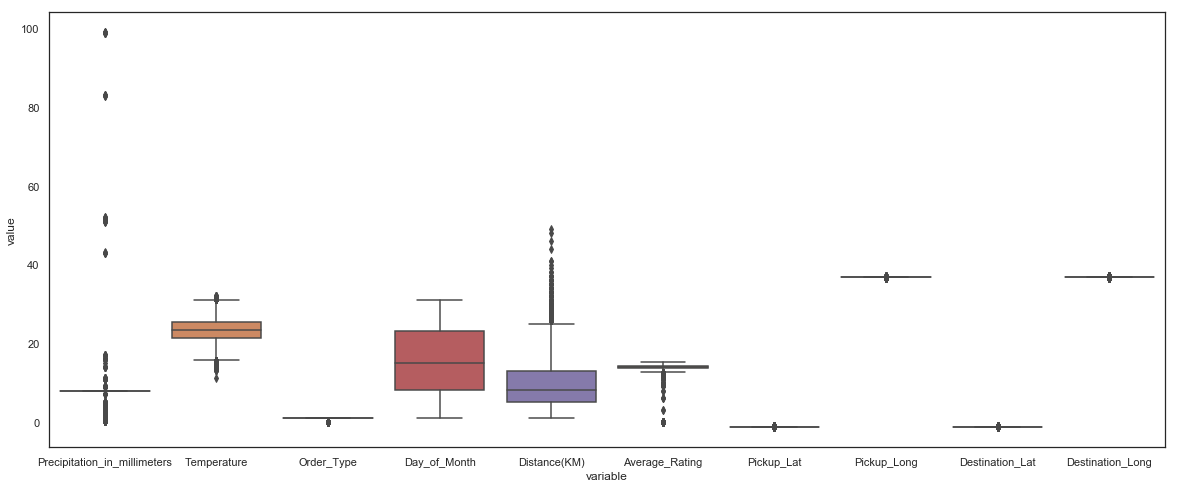

In [484]:
plt.figure(figsize=(20, 8))
sns.boxplot(x="variable", y="value", data=pd.melt(training_df[numerical_Cols]))
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


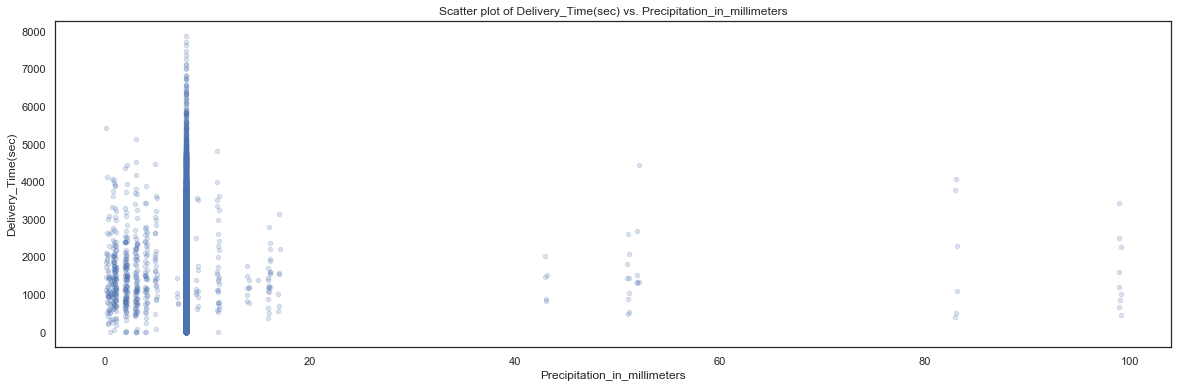

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


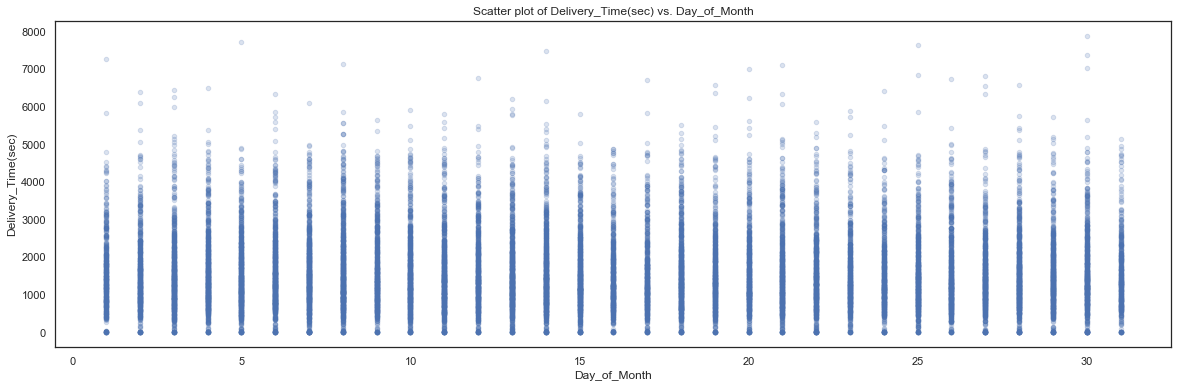

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


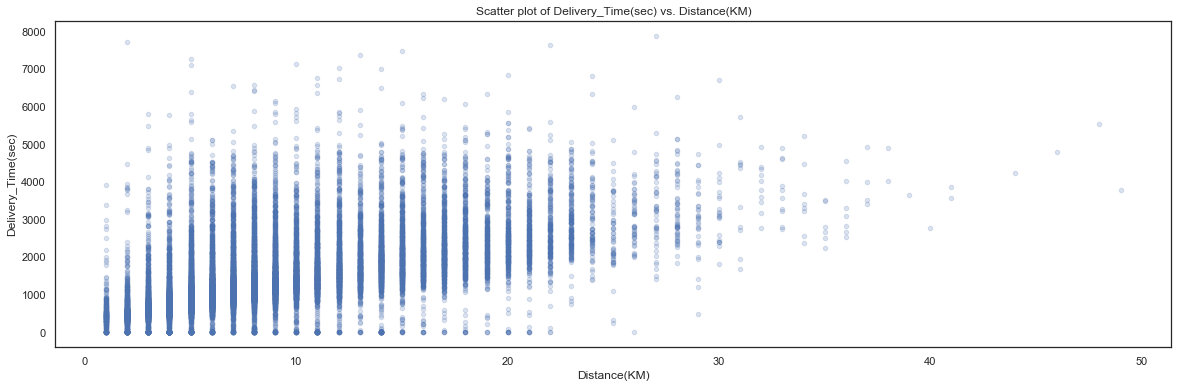

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


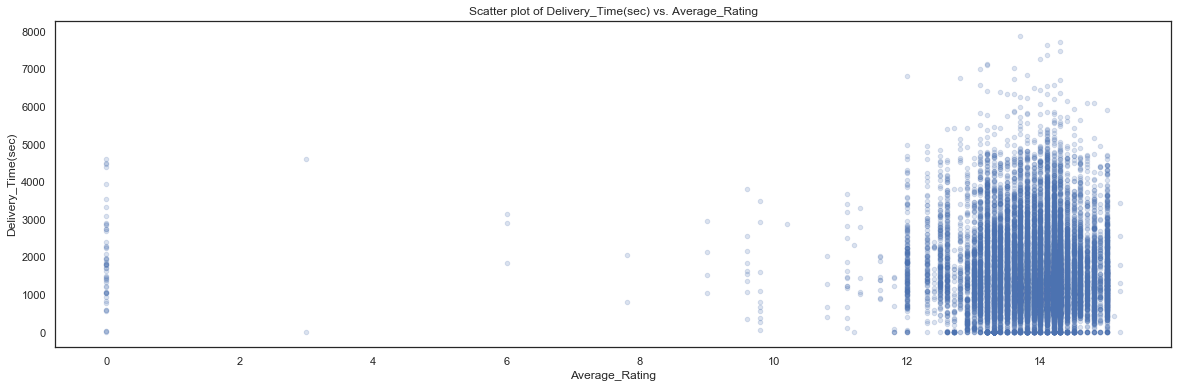

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


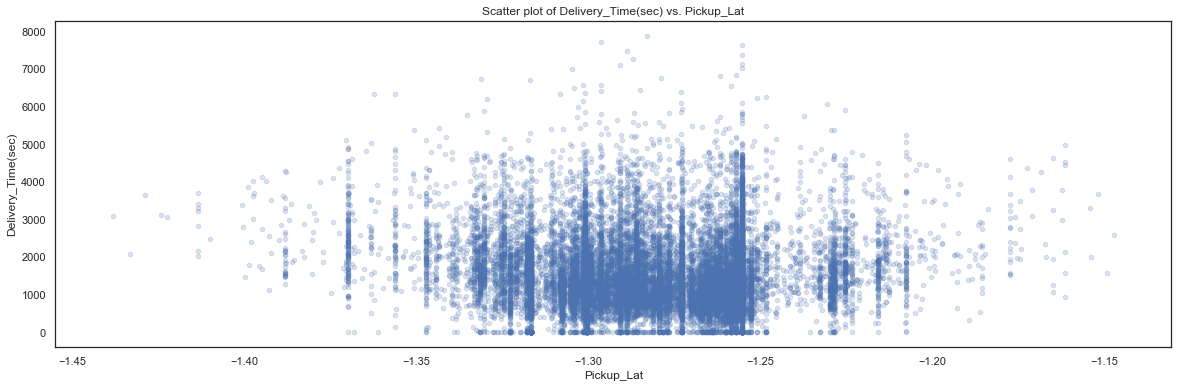

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


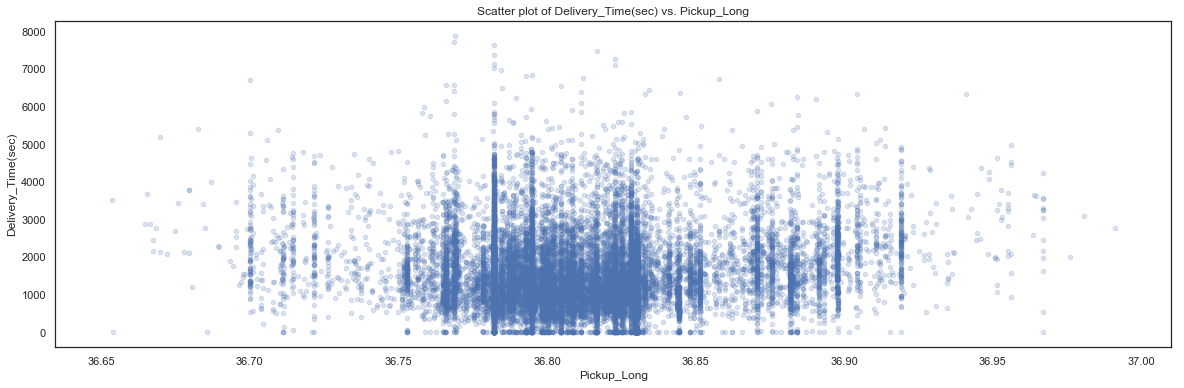

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


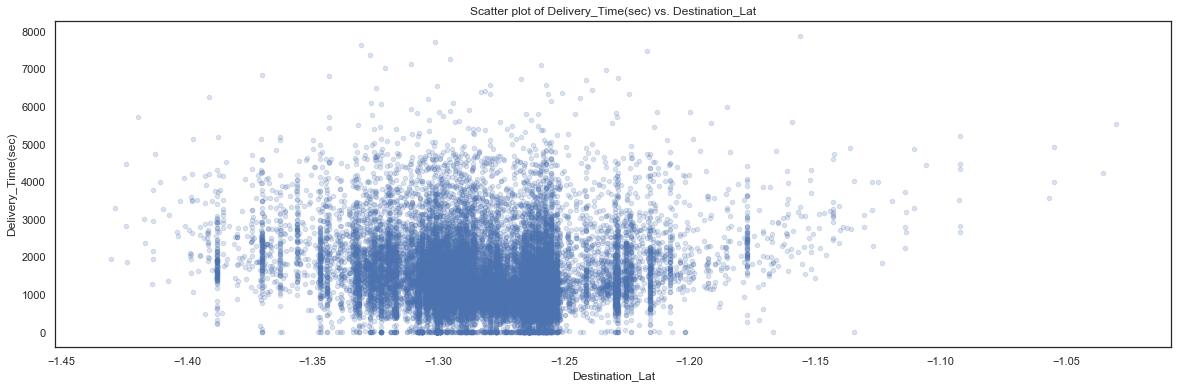

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


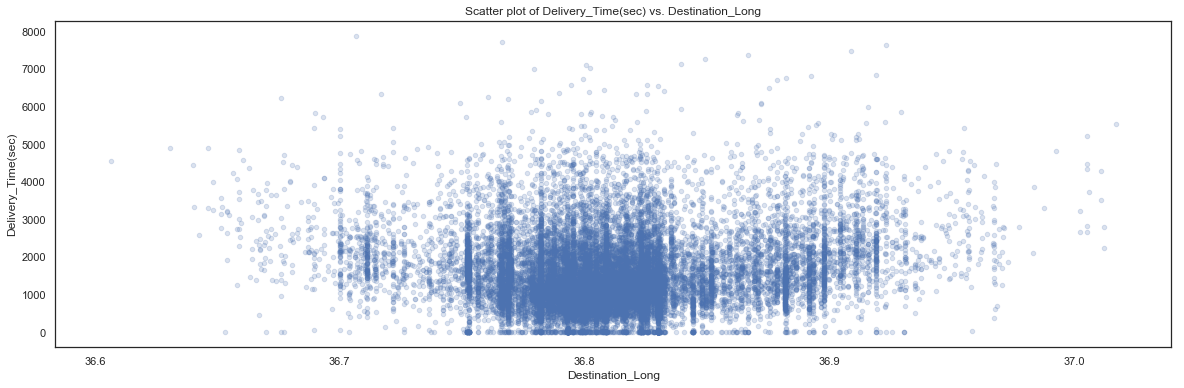

In [485]:
def plot_scatter(df, cols, col_y = 'Delivery_Time(sec)',alpha=1.0):
    for col in cols:
        fig = plt.figure(figsize=(20,6)) # define plot area
        ax = fig.gca() # define axis   
        df.plot.scatter(x = col, y = col_y, ax = ax,alpha=alpha)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y
                     )# Set text for y axis
        plt.show()


plot_scatter(training_df, numerical_Cols,alpha=0.2)  

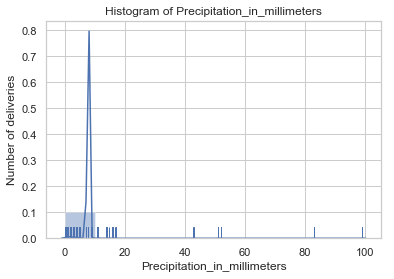

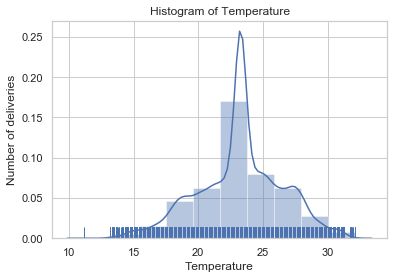

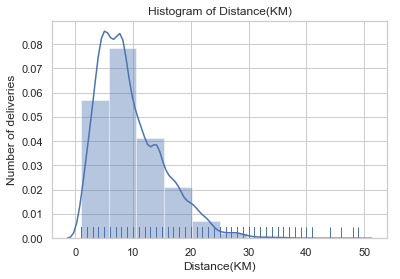

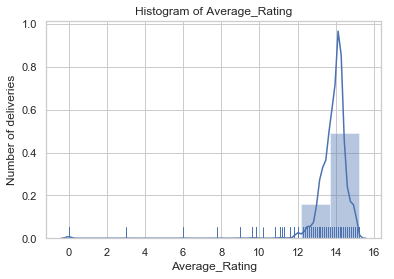

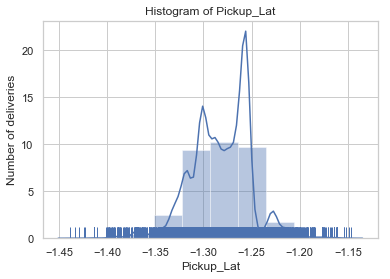

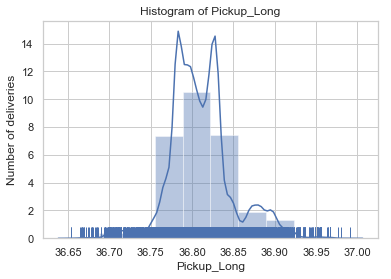

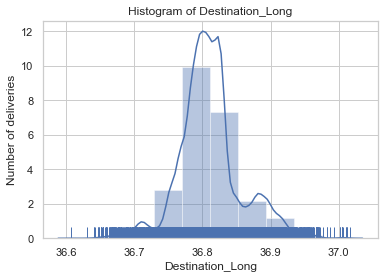

In [486]:
def plot_density_hist(df, cols, bins = 10, hist = True):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(df[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of deliveries')# Set text for y axis
        plt.show()
        
plot_density_hist(training_df, numerical_Cols)

In [487]:
#Correlation between numeric features and the target variable
border = training_df.shape[0]
corr_matrix = training_df[:border][numerical_Cols+['Delivery_Time(sec)']].corr()
print(corr_matrix['Delivery_Time(sec)'])

Precipitation_in_millimeters    0.003842
Temperature                     0.005772
Order_Type                     -0.013354
Day_of_Month                   -0.014701
Distance(KM)                    0.580608
Average_Rating                 -0.042559
Pickup_Lat                     -0.053823
Pickup_Long                     0.060285
Destination_Lat                -0.061872
Destination_Long                0.070425
Delivery_Time(sec)              1.000000
Name: Delivery_Time(sec), dtype: float64


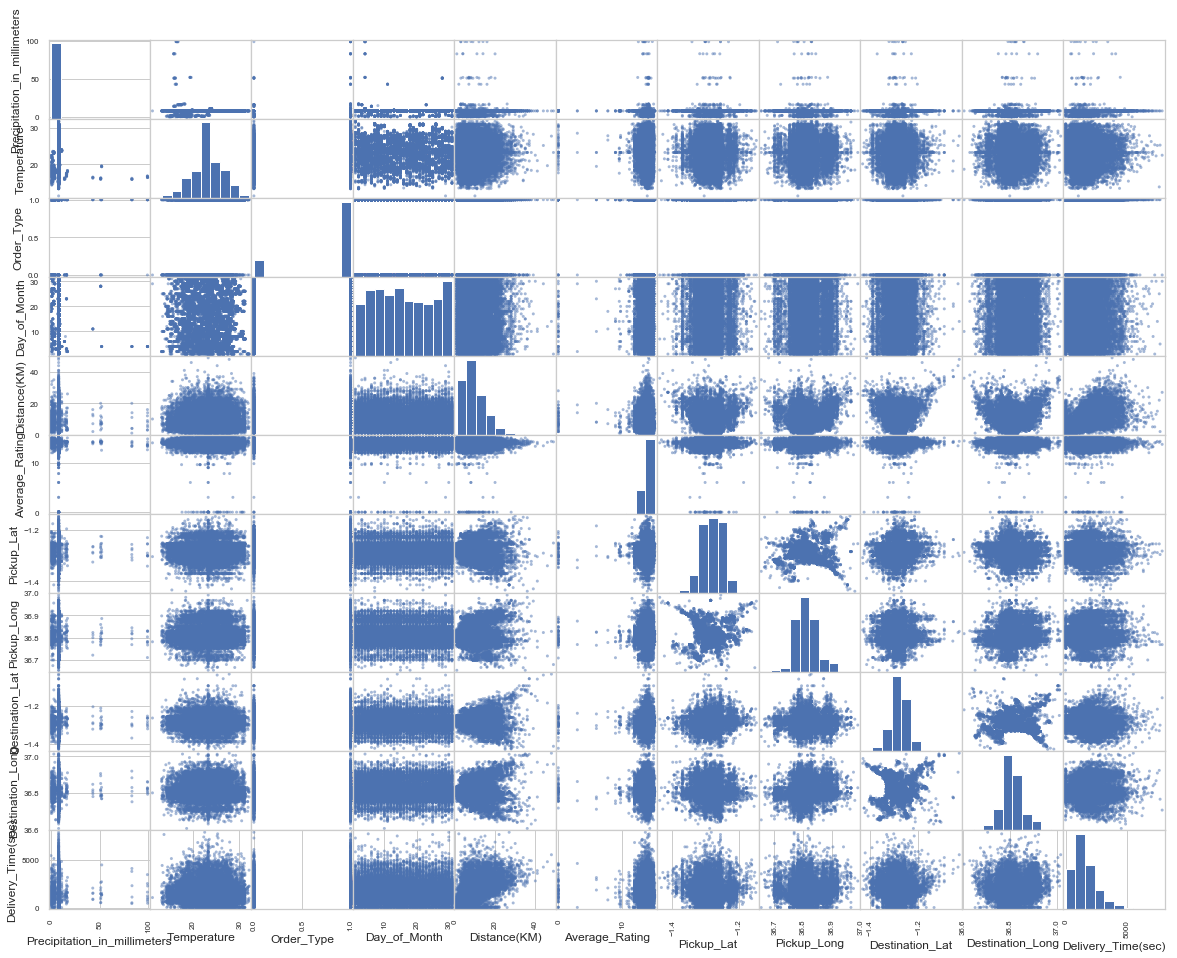

In [488]:
pd.plotting.scatter_matrix(training_df[:border][numerical_Cols+['Delivery_Time(sec)']], figsize=(20,16))
plt.show()

LinAlgError: singular matrix

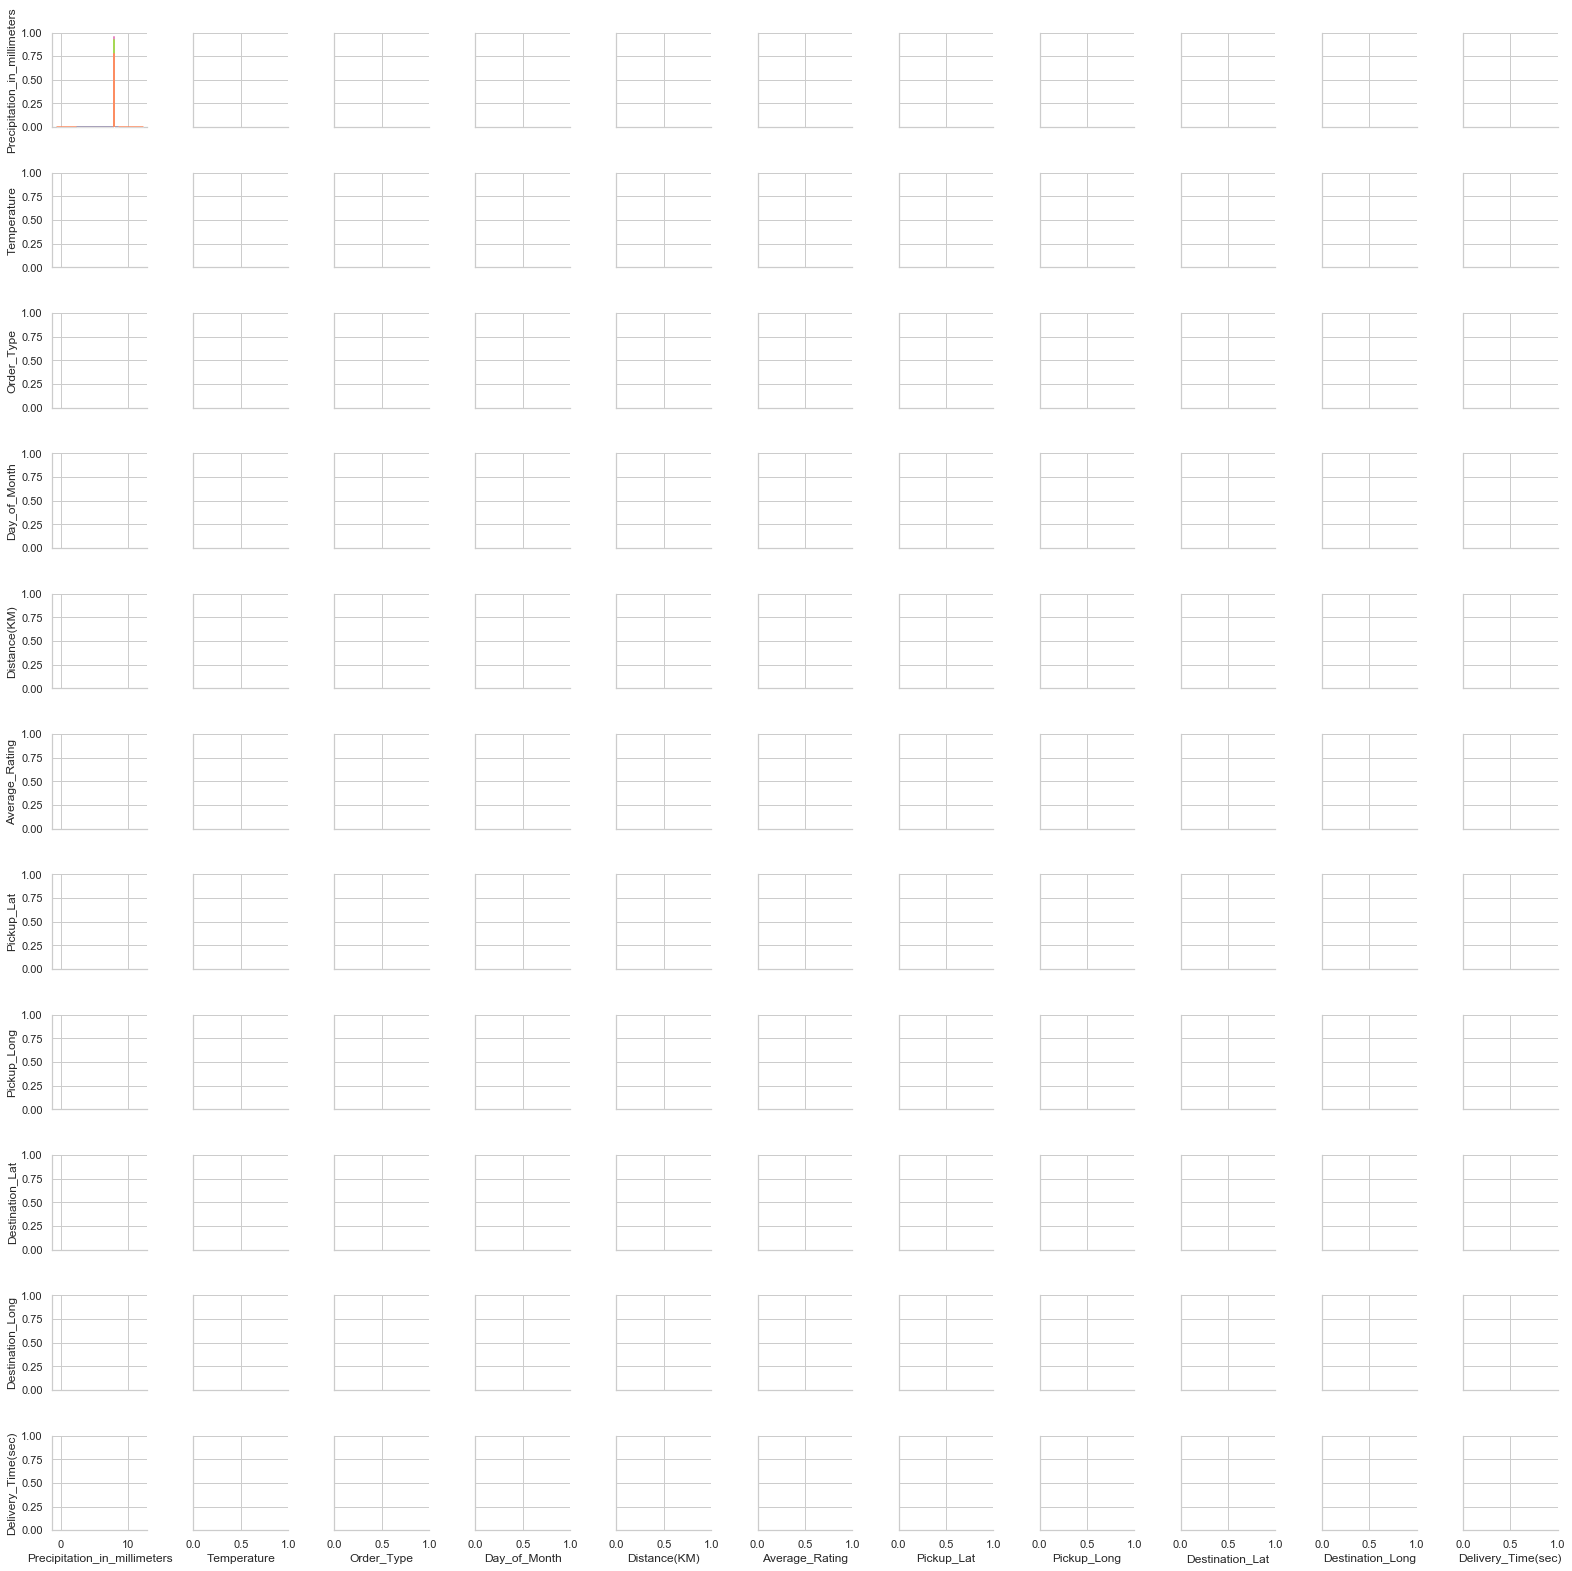

In [489]:
sns.pairplot(training_df[numerical_Cols + ['Delivery_Time(sec)']], hue='Delivery_Time(sec)', palette="Set2", diag_kind="kde", size=2).map_upper(sns.kdeplot, cmap="Blues_d")

In [490]:
training_df.isnull().sum()

Order_No                        0
User_Id                         0
Order_Type                      0
Day_of_Month                    0
Weekday                         0
Time                            0
Distance(KM)                    0
Temperature                     0
Precipitation_in_millimeters    0
Pickup_Lat                      0
Pickup_Long                     0
Destination_Lat                 0
Destination_Long                0
Rider_Id                        0
Delivery_Time(sec)              0
Age                             0
Average_Rating                  0
dtype: int64

In [491]:
# training_df.loc[training_df['Weekday']!= isnumeric()]
# pd.to_numeric(training_df[numerical_Cols], errors='coerce').notnull().all()
# print([data for data in training_df.Weekday if data!= for i in range(8) ])
for data in training_df.Weekday:
#     data=7
    if (data not in range(1,8))== True | data == '>':
        print(data)

In [492]:
import plotly.express as px
# iris = px.data.training_df()
fig = px.scatter_matrix(training_df[numerical_Cols])
fig.show()

In [493]:
training_df['Delivery_Time(sec)'].describe()

count    21201.000000
mean      1556.920947
std        987.270788
min          1.000000
25%        882.000000
50%       1369.000000
75%       2040.000000
max       7883.000000
Name: Delivery_Time(sec), dtype: float64

In [ ]:
Delivery_min = training_df['Delivery_Time(sec)']/60
Delivery_min.hist(bins=60)
plt.title("Delivery time histogram")
plt.xlabel("Delivery time (minutes)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
under_one = training_df[training_df['Delivery_Time(sec)'] < 60]
under_one['Delivery_Time(sec)'].hist(bins=5)

In [ ]:
features = numerical_Cols
data_df = training_df[features]
# border = training_df.shape[0]
y = training_df['Delivery_Time(sec)']
train = data_df
test = testing_df[features]

test.head()

Precipitation_in_millimeters  Temperature  Order_Type  Day_of_Month  \
0                      6.651759     23.24612           1            27   
1                      6.651759     23.24612           1            17   
2                      6.651759     22.80000           1            27   
3                      6.651759     24.50000           1            17   
4                      6.651759     24.40000           1            11   

   Distance(KM)  Average_Rating  Pickup_Lat  Pickup_Long  Destination_Lat  \
0             8            13.3   -1.333275    36.870815        -1.305249   
1             5            14.4   -1.272639    36.794723        -1.277007   
2             5            13.1   -1.290894    36.822971        -1.276574   
3             5            13.7   -1.290503    36.809646        -1.303382   
4             6            14.1   -1.281081    36.814423        -1.266467   

   Destination_Long  
0         36.822390  
1         36.823907  
2         36.851365  
3         36.790658  
4         36.792161

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16960, 10) (4241, 10) (16960,) (4241,)


In [ ]:
rs = 3
kfold = KFold(n_splits=10, random_state=rs, shuffle=True)

regressors = []
regressors.append(SVR())
regressors.append(GradientBoostingRegressor(random_state=rs))
regressors.append(ExtraTreesRegressor(n_estimators=rs))
regressors.append(RandomForestRegressor(random_state=rs))
regressors.append(xgb.XGBRegressor(random_state=rs, objective="reg:squarederror"))
regressors.append(lgb.LGBMRegressor(random_state=rs))

cv_results = []
for regressor in regressors:     #scores to be minimised are negated (neg)
    cv_results.append(np.sqrt(abs(cross_val_score(regressor, X_train, y=y_train, scoring='neg_mean_squared_error', cv=kfold))))

cv_means = []
cv_stds = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_stds.append(cv_result.std())
    
cv_res = pd.DataFrame({ 
    "Algorithm": ["SVR", "GBR", "EXR", "RFR", "XGBR", "LGBM"],
    "CrossValMeans": cv_means, "CrossValErrors": cv_stds
                       })
cv_res = cv_res.sort_values("CrossValMeans", ascending=True)
print(cv_res)

  Algorithm  CrossValMeans  CrossValErrors
5      LGBM     773.005997       11.736591
4      XGBR     782.371786       10.845964
1       GBR     782.717213       10.714457
3       RFR     830.098353       15.012100
2       EXR     933.070831       17.058369
0       SVR     968.562249       16.020480


In [ ]:
params = {
    'n_estimators':[75], # [75, 95],
    'num_leaves': [15], #[12,15, 17],
    'reg_alpha': [0.02], #[0.02, 0.05],
    'min_data_in_leaf': [300],  #[250, 280, 300]
    'learning_rate': [0.1], #[0.05, 0.1, 0.25],
    'objective': ['regression'] #['regression', None]
    }

lsearch = GridSearchCV(estimator = lgb.LGBMRegressor(random_state=rs), cv=kfold,scoring='neg_mean_squared_error', param_grid=params)
lgbm = lsearch.fit(X_train, y_train)

l_params = lgbm.best_params_
l_score = np.sqrt(abs(lgbm.best_score_))
print(lgbm.best_params_, np.sqrt(abs(lgbm.best_score_)))

#try: RandomSearch, hyperopt (bayesian)

{'learning_rate': 0.1, 'min_data_in_leaf': 300, 'n_estimators': 75, 'num_leaves': 15, 'objective': 'regression', 'reg_alpha': 0.02} 774.7335174003405


In [ ]:
RFC = RandomForestRegressor(random_state=rs)
rf_param = {"max_depth":[None], "max_features":[3], "min_samples_split":[10],
           "min_samples_leaf": [3], "n_estimators":[300]}
rsearch = GridSearchCV(RFC, cv=kfold, scoring='neg_mean_squared_error',param_grid=rf_param)
rfm = rsearch.fit(X_train, y_train)

r_score = np.sqrt(abs(rfm.best_score_))
r_params = rfm.best_params_
print(r_score, r_params)

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, n_jobs=-1, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generating a plot of test and training learning curve"""
    plt.figure()
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Trainig examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error', shuffle=True)
    
    #scores - 5 runs, each with 10 fold
    train_scores_mean = -np.mean(train_scores, axis=1) #5 means (each size)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r' )
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    
    plt.legend(loc='best')
    return plt


In [ ]:
#Learning Curves

g = plot_learning_curve(lgbm.best_estimator_, "lgbm learning curves", X_train, y_train, cv=kfold)
g = plot_learning_curve(rfm.best_estimator_, "random forest_learning_curve", X_train, y_train, cv=kfold)

#lgbm: mse error decreases drastically then levels at the train size of 12000 rows adding more data 
#will not improve the score significantly, in this case we try a diff approach (changing the data)
#rf: mse error decreases very slowly, this model would require a lot of data to improve score

In [ ]:
vals = lgbm.best_estimator_.feature_importances_
l_importance = np.array([ val/sum(vals) for val in vals ])
r_importance  = rfm.best_estimator_.feature_importances_
feats = np.array(features)

fig,axes = plt.subplots(1,2, figsize=(12, 8))
plt.subplots_adjust(top=0.6, bottom=0.2, hspace=.6, wspace=0.8)

indices = np.argsort(l_importance)[::-1]
g = sns.barplot(y=feats[indices], x=l_importance[indices], orient='h', ax=axes[0])
g.set_xlabel("Relative importances", fontsize=12)
g.set_ylabel("Features", fontsize=12)
g.tick_params(labelsize=9)
g.set_title(" LGBM feature importance")

index = np.argsort(r_importance)[::-1]
g = sns.barplot(y=feats[index], x=r_importance[index], orient='h', ax=axes[1])
g.set_xlabel("Relative importances", fontsize=12)
g.set_ylabel("Features", fontsize=12)
g.tick_params(labelsize=9)
g.set_title(" Random Forest feature importance")
plt.show()

In [ ]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

lparams = {
           'learning_rate': 0.1, 'min_data_in_leaf': 300, 
           'n_estimators': 75, 'num_leaves': 20, 'random_state':rs,
           'objective': 'regression', 'reg_alpha': 0.02,
          'feature_fraction': 0.9, 'bagging_fraction':0.9}


lgbm = lgb.train(lparams, lgb_train, valid_sets=lgb_eval, num_boost_round=20, early_stopping_rounds=20)

lpred = lgbm.predict(X_test, num_iteration=lgbm.best_iteration)

print("The RMSE of prediction is ", mean_squared_error(y_test, lpred)**0.5)


In [ ]:
lgbm_y = lgbm.predict(test, num_iteration=lgbm.best_iteration)
lgbm_output = pd.DataFrame({"Order No":testing_df['Order_No'], 
                           "Time from Pickup to Arrival": lgbm_y.round(2) })
lgbm_output.to_csv("submission1.csv", index=False)

In [ ]:
testing_df.shape
